<a href="https://colab.research.google.com/github/LSST-TVSSC/LSST-TVSSC.github.io/blob/main/TVSaffiliations/mapTVS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import shapely
#from mpl_toolkits.basemap import Basemap
import unicodedata
#from unidecode import unidecode
import json
import geopandas as gpd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.2 MB/s eta 0:00:00


In [3]:
from unidecode import unidecode


In [4]:
import json
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib


def get_jsonparsed_data(url):
    """
    from http://stackoverflow.com/questions/12965203/how-to-get-json-from-webpage-into-python-script
    Receive the content of ``url``, parse it as JSON and return the object.
    Parameters
    ----------
    url : str
    Returns
    -------
    dict
    """
    response = urllib.urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)



In [7]:
affs = pd.read_csv("LSST_TVS_subgroups - main (1).csv").groupby("affiliation").count()

In [8]:
y = lambda x: unidecode(unicodedata.normalize('NFKD', #unicode(x.split("/")[0], errors="ignore")
              x.split("/")[0]).replace("Università", "Universita").strip())
#unicode(x.split("/")[0], errors="replace")
#unicode(x.split("/")[0], errors="replace")

affs['aff'] = affs.index.map(y)
affs['aff'].unique()

array(['AAVSO', 'ASI-INAF', 'AURA', 'Adler Planetarium',
       'Ahmedabad University', 'Angelo State University',
       'Anton Pannekoek Institute for Astronomy, University of Amsterdam',
       'Argonne National Lab', 'Arizona State University',
       'Armagh Observatory and Planetarium',
       'Astronomical Observatory Belgrade',
       'Astronomical Observatory of Belgrade',
       'Australian National University', 'CIERA', 'CMM-UChile',
       'CNRS-in2p3', 'CSFK Konkoly Observatory, Hungary', 'CUNY',
       'California State University Stanislaus', 'Caltech',
       'Cardiff University', 'Carnegie Institution for Science',
       'Carnegie Mellon University', 'Carnegie Observatories',
       'Center for Astrophysics and Cosmoslogy, University of Nova',
       'Center for Astrophysics | Harvard & Smithsonian',
       'Centro Brasileiro de Pesquisas Fisicas',
       'Cerro Tololo Inter-American Observatory',
       'Cerro Tololo Inter-American Observatory (CTIO)',
       'Columb

# Definitions

In [9]:
affsloc = {}
for f in affs['aff'].unique():
    f = unidecode(f)

   #US
    if f == 'LCOGT' or "UC Santa Barbara" in f or "Las Cumbres Observatory" in f:
        f2 = 'University of California Santa Barbara'
    elif f  == "NOAO" or f=="AURA" or "NOIRLab" in f or "Arizona State University" in f or "Univeristy of Arizona" in f:
        f2 = "Arizona University"
    elif "Carnegie" in f:
        f2 = "Pasadena CA"
    elif "CIERA" in f or "Northwestern University" in f:
        f2 = "Chicago IL"
    elif "Columbia" in f:
        f2 = "New York NY"
    elif 'Virgin Islands' in f:
        f2 = 'US Virgin Islands'
    elif "A&M" in f:
        f2 = 'College Station TX'
    elif "Harvard" in f:
        f2 = "Cambridge MA"
    elif f == "Hobart and William Smith Colleges":
        f2 = "Geneva, New York"
    elif "SETI Institute" in f:
        f2 = "Mountain View, CA"
    elif "Space Telescope Science Institute" in f:
        f2  = "Baltimore"
    elif "Kavli Institute for Particle Astrophysics and Cosmology" in f or "Linear Accelerator Laboratory" in f or "SLAC" in f:
        f2 = "Stanford CA"
    elif f == 'JPL':
        f2 = 'Pasadena CA'
    elif f == 'LBL':
        f2 = 'Berkeley CA'
    elif f == "High Altitude Observatory at the National Center for Atmospheric Research":
        f2 = "Boulder Colorado"
    elif "Urbana–Champaign" in f:
        f2 = "Champaign IL"
    elif "University of Delaware" in f:
        f2 = "Newark Delaware"
    elif "University of Illinois" in f or "National Center for Supercomputing Applications" in f:
        f2 = "Champaign IL"
    elif "Goodard" in f or "GSFC" in f:
        f2 = "Greenbelt Maryland"
    elif "STScI" in f or "Spate Telescope" in f:
        f2 = "Baltimore Maryland"
    elif "Stanford" in f:
        f2 = "Palo Alto California"
    elif "UW" in f or f == "University of Washington":
        f2 = "Seattle Washington"
    elif "North Carolina" in f:
        f2 = "Raleigh North Carolina"
    elif "MIT" in f:
        f2 = "Boston MA"
    elif "University of California Davis" in f:
        f2 = "Irvine California"
    elif "Penn State" in f:
        f2 = "University Park, PA"
    elif "Siena College" in f:
        f2 = "Loudonville New York"
    elif "University of California, Santa Cruz" in f:
        f2 = "Santa Cruz California"
    elif "University of Hawai" in f:
        f2 = "Honolulu Hawaii"
    elif "University of Maryland College Park" in f:
        f2 = "University of Maryland"
    elif f == "University of Texas Rio Grande Valley" in f:
        f2 = "Edinburg Texas"
    elif f == "University of Virginia" or f == "NRAO":
        f2 = "Charlottesville, VA"
    elif "Stevens Point" in f:
        f2 = "Stevens Point, Wisconsin, USA"
    elif "Vanderbilt" in f:
        f2 = "Nashville, TN"

    #Chile
    elif f == "Gemini Observatory" or "Universidad La Serena" in f or 'SOAR' in f or "Cerro Tololo" in f:
        f2 = "La Serena Chile"
    elif f == "Universidad Catolica de Chile" or "Pontificia Universidad" in f or "PUC-Chile" in f \
          or "Andres Bello" in f or f == "Universidad de Chile" or f in "Universidad Diego Portales" or "UChile" in f:
        f2 = 'Santiago Chile'
    elif "Universidad Catolica del Norte" in f:
        f2 = "Antofagasta"
    elif ("DAS" in f and "CMM" in f):
        f2 = "Santiago Chile"



    #Australia and Asia
    elif "Curtin" in f:
        f2 = "Perth, Australia"
    elif "National Central University" in f:
        f2 = "Taipei Taiwan"
    elif "Australian National Unversity" in f or "Stromlo" in f:
        f2 = "Canberra Australia"
    elif f == "Renmin University of China" :
        f2 = "Beijing China"


    # Central and South america
    elif "Conicet" in f or "ICAS" in f or "Universidad Nacional de San Martín" in f:
        f2 = "Buenos Aires Argentina"
    elif "IATE" in f or "Córdoba" in f or "Cordoba" in f:
        f2 = "Cordoba Argentina"
    elif "Centro Brasileiro de Pesquisas Fisicas" in f or 'Laboratorio Nacional de Astrofísica' in f:
        f2 = "Rio de Janeiro Brazil"
    elif "UNAM" in f:
        f2 = "Mexico City Mexico"

    #india
    elif "Ahmedabad" in f:
      f2 = "Ahmedabad India"
    elif "IUCAA" in f or "Indian" in f:
        f2 = "Pune India"

    # UK
    elif "Liverpool" in f:
        f2 = "Liverpool UK"
    elif f == 'University of Central Lancashire' or f == 'University of Portsmouth':
        f2 = f.split()[-1] + ' UK'
    elif "Armagh" in f:
        f2 = "Armagh UK"
    elif "Edinburgh" in f:
        f2 = "Edinburgh UK"
    elif "Oxford University" in f or "University of Oxford" in f:
      f2 = "Oxford England UK"
    elif "The Open University" in f:
        f2 = "London UK"
    elif f == 'University of Warwick' :
        f2 = "Coventry England UK"

    #Central Western Europe
    elif "in2p3" in f or "IN2P3" in f or "IJCLab" in f:
        f2 = 'Paris France'
    elif 'Max Planck' in f:
        f2 = 'Munchen Germany'
    elif "DARK" in f:
        f2 = "Copenhagen Denmark"
    elif "DTU Space" in f:
        f2 = "Kongens Lyngby, Denmark"
    elif "Zeuthen" in f:
        f2 = "Zeuthen, Germany"
    elif "Canarias" in f:
        f2 = "Canary Islands Spain"
    elif "ICCUB" in f:
        f2 = "Barcelona Spain"
    elif "Gottingen" in f:
        f2 = "Gottingen Germany"
    elif "Marseille" in f:
        f2 = "Marseille France"
    elif "Heidelberg" in f:
        f2 = "Heidelberg Germany"
    elif "Warsaw" in f or "Copernicus Astronomical Center" in f or "Poland" in f or "Copernicus" in f:
        f2 = "Warsaw Poland"
    elif "Nova Gorica" in f:
        f2 = "Nova Gorica"
    elif "Geneva" in f:
        f2 = "Geneva Switzerland"
    elif "NASA" in f:
        f2 = "Pasadena CA"


    # Eastern Europe
    elif "Belgrade" in f:
        f2 = "Belgrade"
    elif "Konkoly" in f:
        f2 = "Budapest Hungary"
    elif "FZU" in f:
        f2 = "Prague, Czech Republic"
    elif "Radboud University" in f:
        f2 = "Nijmegen, Netherlands"
    elif "Bošković" in f or "Bojcovic" in f or "Boskovic" in f:
        f2 = "Zagreb, Croatia"

    # Africa
    elif "Entoto" in f or "Werabe University" in f:
        f2 = "Addis Ababa Ethiopia"
    elif "Wolaita" in f:
        f2 = "Soddo, Ethiopia"
    elif "SAAO" in f:
        f2 = "Cape Town South Africa"
    elif "University of Cape Town" in f:
        f2 = "Cape Town South Africa"


    #Italy
    elif 'Tor Vergata' in f:
        f2='Roma IT'
    elif "Federico II" in f:
        f2 = "Naples Italy"
    elif "Scuola Normale" in f or "Scuola Superiore" in f:
        f2 = "Pisa IT"
    elif "Milano Bicocca" in f:
        f2 = "Milano IT"
    elif "INAF - Osservatorio Astronomico di " in f:
        f2 = f.replace("INAF - Osservatorio Astronomico di ", "").replace("INAF - Osservatorio Astronomico ","").split(" ")[0] + " Italy"
    elif "Torino" in f:
        f2 = "Torino IT"
    elif "Padova" in f:
        f2 = "Padova IT"
    elif "Capodimonte" in f:
        f2 = "Napoli IT"
    elif "Brera" in f:
        f2 = "Milano IT"
    elif "Bologna" in f:
        f2 = "Bologna IT"
    elif "Pisa" in f:
        f2 = "Pisa IT"
    elif "Palermo" in f:
        f2 = "Palermo IT"
    elif "di Roma" in f or "of Roma" in f:
        f2 = "Roma IT"
    elif "OATS" in f:
        f2 = "Trieste IT"
    elif "Insubria" in f:
        f2 = "Varese, Italy"
    elif "Gran Sasso" in f:
        f2 = "L'Aquila, Italy"
    elif "Universita degli Studi" in f or "Osservatorio Astrofisico" in f \
        or "University of" in f or "Universita di" in f:
        f2 = " ".join(f.split()[-1].split("'")[-1:])
    elif "INAF" in f or f == "IAPS" :
      f2 = 'Roma IT'

    #whats left
    elif "LSST" in f: #putting all other LSST people in Chile
      f2 = "La Serena, Chile"
    else:
      f2 = f.replace("Lab", "Laboratory").replace("Laboratoryoratory", "Laboratory")
    if f2 == "Nova": f2 = "Nova Gorica Slovenia"
    #print(f2)
    url = 'http://api.geonames.org/searchJSON?q=%s&maxRows=10&username=freedsbi'%(f2.replace(" ", "%20"))
    try:
        #print (f, url, get_jsonparsed_data(url)["geonames"])
        site = get_jsonparsed_data(url)["geonames"][0]
        if site["geonameId"] == 3914925:
            print ("failed - limit reached?")
            break
        affsloc[f] = ((site['lat'], site['lng']), site['countryName'], site['adminCode1'])
        #print(affsloc[f])
    except:
        print (f, url)
        affsloc[f] = ((np.nan, np.nan), np.nan,  np.nan)

    print(f2, affsloc[f][1])


AAVSO http://api.geonames.org/searchJSON?q=AAVSO&maxRows=10&username=freedsbi
AAVSO nan
Roma IT Italy
Arizona University United States
Adler Planetarium United States
Ahmedabad India India
Angelo State University United States
Amsterdam The Netherlands
Argonne National Laboratory United States
Arizona University United States
Armagh UK United Kingdom
Belgrade Serbia
Belgrade Serbia
Australian National University Australia
Chicago IL United States
Santiago Chile Chile
Paris France France
Budapest Hungary Hungary
CUNY United States
California State University Stanislaus United States
Caltech United States
Cardiff University United Kingdom
Pasadena CA United States
Pasadena CA United States
Pasadena CA United States
Nova Gorica Slovenia Slovenia
Cambridge MA United States
Rio de Janeiro Brazil Brazil
La Serena Chile Chile
La Serena Chile Chile
New York NY United States
New York NY United States
Cornell University United States
Perth, Australia Australia
Perth, Australia Australia
Perth, A

In [10]:
affs['loc'] = affs['aff'].map(affsloc)
affs['loc'][0] = ((np.nan,np.nan),np.nan)
affs['loc'][0], affs['loc'][1], [0][0]

<ipython-input-10-250201a4a1d0>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  affs['loc'][0] = ((np.nan,np.nan),np.nan)
<ipython-input-10-250201a4a1d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

(((nan, nan), nan), (('41.89193', '12.51133'), 'Italy', '07'), 0)

# Results

In [ ]:
affsloc


{'AAVSO': ((nan, nan), nan, nan),
 'ASI-INAF': (('41.89193', '12.51133'), 'Italy', '07'),
 'AURA': (('32.23188', '-110.95347'), 'United States', 'AZ'),
 'Adler Planetarium': (('41.86614', '-87.60672'), 'United States', 'IL'),
 'Ahmedabad University': (('23.02579', '72.58727'), 'India', '09'),
 'Angelo State University': (('31.43544', '-100.4612'), 'United States', 'TX'),
 'Anton Pannekoek Institute for Astronomy, University of Amsterdam': (('52.37403',
   '4.88969'),
  'The Netherlands',
  '07'),
 'Argonne National Lab': (('41.71059', '-87.98312'), 'United States', 'IL'),
 'Arizona State University': (('32.23188', '-110.95347'),
  'United States',
  'AZ'),
 'Armagh Observatory and Planetarium': (('54.35', '-6.66667'),
  'United Kingdom',
  'NIR'),
 'Astronomical Observatory Belgrade': (('44.80401', '20.46513'),
  'Serbia',
  'SE'),
 'Astronomical Observatory of Belgrade': (('44.80401', '20.46513'),
  'Serbia',
  'SE'),
 'Australian National University': (('-35.27772', '149.11891'),
  '

In [ ]:
affsloc

{'AAVSO': ((nan, nan), nan, nan),
 'ASI-INAF': (('41.89193', '12.51133'), 'Italy', '07'),
 'AURA': (('32.23188', '-110.95347'), 'United States', 'AZ'),
 'Adler Planetarium': (('41.86614', '-87.60672'), 'United States', 'IL'),
 'Ahmedabad University': (('23.02579', '72.58727'), 'India', '09'),
 'Angelo State University': (('31.43544', '-100.4612'), 'United States', 'TX'),
 'Anton Pannekoek Institute for Astronomy, University of Amsterdam': (('52.37403',
   '4.88969'),
  'The Netherlands',
  '07'),
 'Argonne National Lab': (('41.71059', '-87.98312'), 'United States', 'IL'),
 'Arizona State University': (('32.23188', '-110.95347'),
  'United States',
  'AZ'),
 'Armagh Observatory and Planetarium': (('54.35', '-6.66667'),
  'United Kingdom',
  'NIR'),
 'Astronomical Observatory Belgrade': (('44.80401', '20.46513'),
  'Serbia',
  'SE'),
 'Astronomical Observatory of Belgrade': (('44.80401', '20.46513'),
  'Serbia',
  'SE'),
 'Australian National University': (('-35.27772', '149.11891'),
  '

In [ ]:
affsgeo = gpd.GeoDataFrame(affs)

In [ ]:
affsgeo

,surname,first name,continent/country,email,signed CoC,Unnamed: 6,primary,secondary,secondary.1,secondary.2,secondary.3,Unnamed: 12,date added,added by,aff,loc
affiliation,,,,,,,,,,,,,,,,
AAVSO,2,2,2,2,2,2,2,2,2,1,0,0,0,0,AAVSO,"((nan, nan), nan)"
ASI-INAF,1,1,1,1,1,1,1,1,1,0,0,0,0,0,ASI-INAF,"((41.89193, 12.51133), Italy, 07)"
AURA/LSST,1,1,1,1,1,1,1,1,0,0,0,0,0,0,AURA,"((32.23188, -110.95347), United States, AZ)"
Adler Planetarium,1,1,1,1,1,1,1,1,1,1,0,0,0,0,Adler Planetarium,"((41.86614, -87.60672), United States, IL)"
Ahmedabad University,1,1,1,1,1,1,1,1,1,0,0,0,0,0,Ahmedabad University,"((23.02579, 72.58727), India, 09)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wolaita Sodo University,1,1,1,1,1,1,1,1,1,0,0,0,0,0,Wolaita Sodo University,"((8.7, 38.38333), Ethiopia, 51)"
Wolaita Sodo Unversity,1,1,1,1,1,1,1,1,0,0,0,0,0,0,Wolaita Sodo Unversity,"((8.7, 38.38333), Ethiopia, 51)"
Yale University,1,1,1,1,1,0,1,1,1,0,0,0,1,1,Yale University,"((41.31121, -72.92649), United States, CT)"


In [ ]:
#[float(affs['loc'][i][0][0]) for i in range(len(affs['loc']))]
#[float(affs['loc'][i][0][1]) for i in range(len(affs['loc']))]

In [ ]:
# combine lat and lon to one column
affs['lonlat'] = list(zip([float(affs['loc'][i][0][0]) for i in range(len(affs['loc']))], [float(affs['loc'][i][0][1]) for i in range(len(affs['loc']))]))
# Create Point Geometry for based on lonlat column
affs['geometry'] = affs[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
affs.head()



<ipython-input-51-1b1dc62cfcf4>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  affs['lonlat'] = list(zip([float(affs['loc'][i][0][0]) for i in range(len(affs['loc']))], [float(affs['loc'][i][0][1]) for i in range(len(affs['loc']))]))
<ipython-input-51-1b1dc62cfcf4>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  affs['geometry'] = affs[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))


,surname,first name,continent/country,email,signed CoC,Unnamed: 6,primary,secondary,secondary.1,secondary.2,secondary.3,Unnamed: 12,date added,added by,aff,loc,lonlat,geometry
affiliation,,,,,,,,,,,,,,,,,,
AAVSO,2,2,2,2,2,2,2,2,2,1,0,0,0,0,AAVSO,"((nan, nan), nan)","(nan, nan)",POINT EMPTY
ASI-INAF,1,1,1,1,1,1,1,1,1,0,0,0,0,0,ASI-INAF,"((41.89193, 12.51133), Italy, 07)","(41.89193, 12.51133)",POINT (41.89193 12.51133)
AURA/LSST,1,1,1,1,1,1,1,1,0,0,0,0,0,0,AURA,"((32.23188, -110.95347), United States, AZ)","(32.23188, -110.95347)",POINT (32.23188 -110.95347)
Adler Planetarium,1,1,1,1,1,1,1,1,1,1,0,0,0,0,Adler Planetarium,"((41.86614, -87.60672), United States, IL)","(41.86614, -87.60672)",POINT (41.86614 -87.60672)
Ahmedabad University,1,1,1,1,1,1,1,1,1,0,0,0,0,0,Ahmedabad University,"((23.02579, 72.58727), India, 09)","(23.02579, 72.58727)",POINT (23.02579 72.58727)


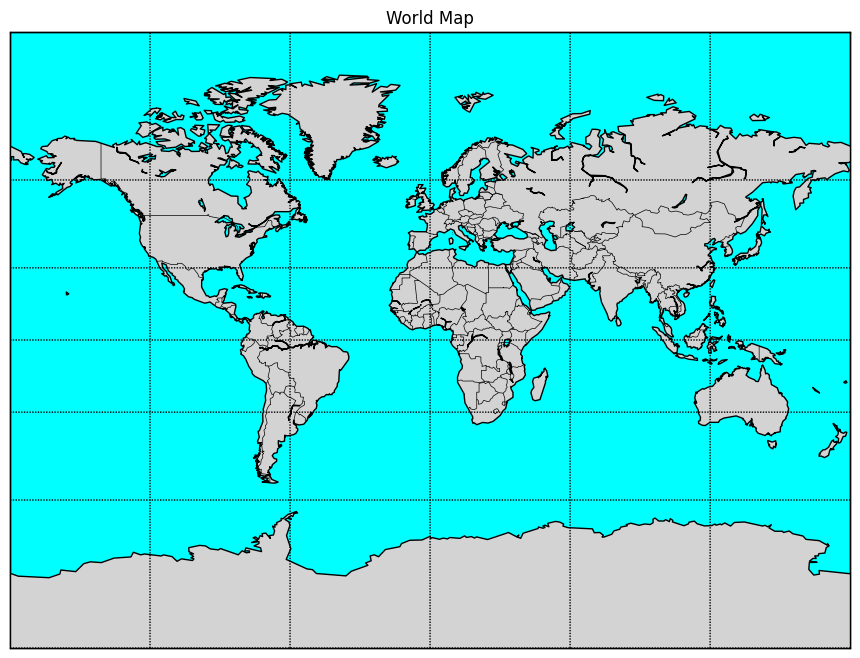

In [ ]:
# prompt: get a basemap for plotting

!pip install basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# create a new figure and axes
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# create a basemap instance
m = Basemap(projection='mill', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c', ax=ax)

# draw coastlines, countries, and fill continents
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='aqua')

# draw parallels and meridians
m.drawparallels(np.arange(-90., 91., 30.))
m.drawmeridians(np.arange(-180., 181., 60.))

# draw map boundaries
m.drawmapboundary(fill_color='aqua')


# Add your plotting code here, using the 'm' object to transform coordinates

# Example: Plot a point
#x, y = m(-74.0060, 40.7128) # New York City
#m.plot(x, y, 'ro', markersize=8)


plt.title("World Map")
plt.show()

In [ ]:

m.drawcoastlines()
#m.shadedrelief()
#m.drawcountries()

In [ ]:
affs['loc'][:][0][0]


<ipython-input-54-ba08bc7f9a67>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  affs['loc'][:][0][0]


(nan, nan)

<ipython-input-55-1a734e680dca>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pl.scatter([float(affs['loc'][i][0][1]) for i in range(len(affs['loc']))],
<ipython-input-55-1a734e680dca>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [float(affs['loc'][i][0][0]) for i in range(len(affs['loc']))], c='SteelBlue', alpha=.3, s=30)


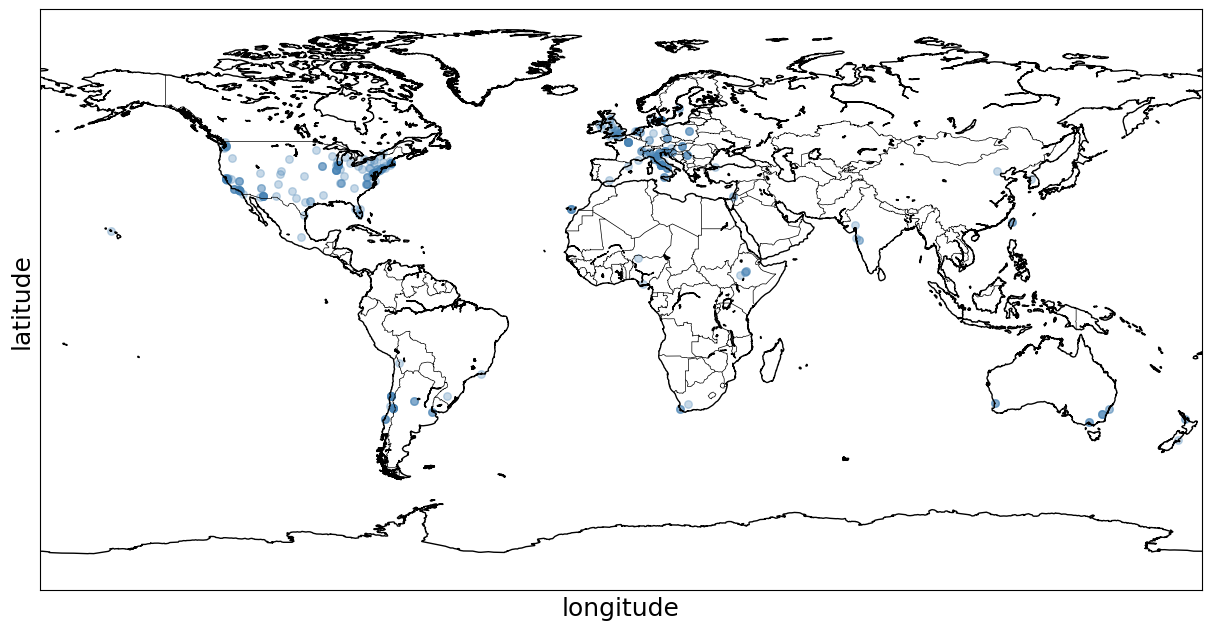

In [ ]:
pl.figure(figsize=(15,10))
pl.scatter([float(affs['loc'][i][0][1]) for i in range(len(affs['loc']))],
           [float(affs['loc'][i][0][0]) for i in range(len(affs['loc']))], c='SteelBlue', alpha=.3, s=30)
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
m = Basemap(width=12000000, height=9000000, projection='cyl',
            resolution='l', lat_1=-90, lat_2=90, lat_0=0, lon_0=0.)
m.drawcoastlines()
#m.drawstates()
m.drawcountries()
pl.savefig("LSST_TVS_World.png")

In [ ]:
pl.figure(figsize=(15,10))
pl.scatter([float(affs['loc'][i][0][1]) for i in range(len(affs['loc']))],
           [float(affs['loc'][i][0][0]) for i in range(len(affs['loc']))], c='purple', alpha=.3, s=30)
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
pl.ylim(0,90)
pl.xlim(-60,-90)
m = Basemap(width=12000000,height=9000000, projection='cyl',
            resolution='l')

m.drawcoastlines()
m.drawcountries()
m.drawstates();
pl.xlim(-165, -60)
pl.ylim(0, 55)
pl.savefig("LSST_TVS_USA.png")

In [ ]:
pl.figure(figsize=(15,10))
pl.scatter([float(affs['loc'][i][0][1]) for i in range(len(affs['loc']))],
           [float(affs['loc'][i][0][0]) for i in range(len(affs['loc']))], c='purple', alpha=.3, s=30)
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)

m = Basemap(width=12000000,height=9000000, projection='cyl',
            resolution='l')

m.drawcoastlines()
m.drawcountries()
m.drawstates();
pl.xlim(-20, 40)
pl.ylim(30, 60)
pl.savefig("LSST_TVS_EU.png");